In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
count = 0 
dirs = os.listdir('C:/Users/Shabnoor/Downloads/Images/')
for dir in dirs:
    files = list(os.listdir('C:/Users/Shabnoor/Downloads/Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

rose Folder has 784 Images
sunflower Folder has 733 Images
Images Folder has 1517 Images


In [3]:
base_dir = 'C:/Users/Shabnoor/Downloads/Images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1517 files belonging to 2 classes.
Using 1214 files for training.
Found 1517 files belonging to 2 classes.
Using 303 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names

['rose', 'sunflower']

In [6]:
import matplotlib.pyplot as plt

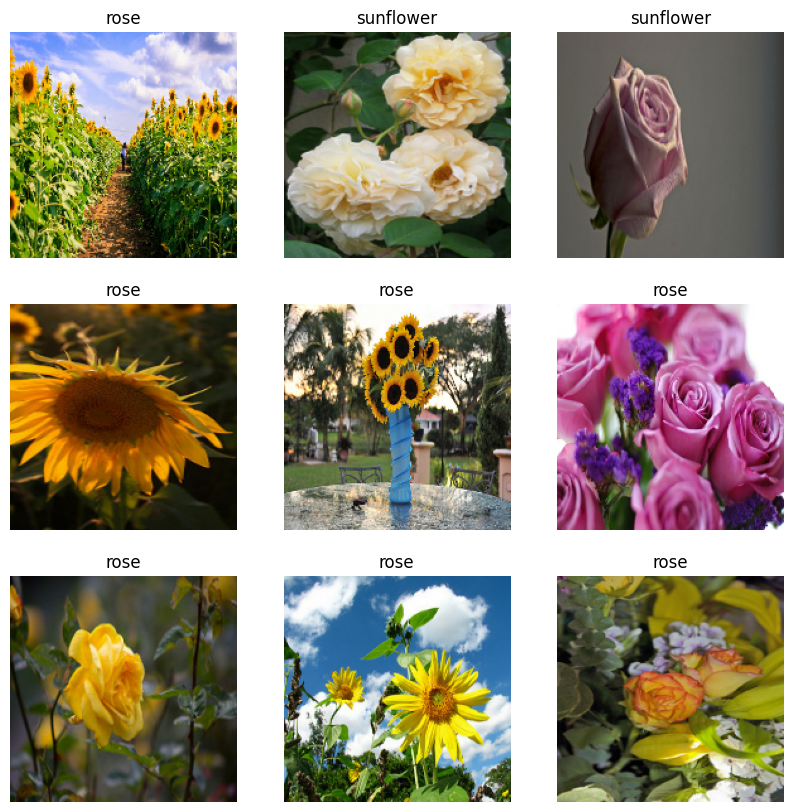

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [49]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
])

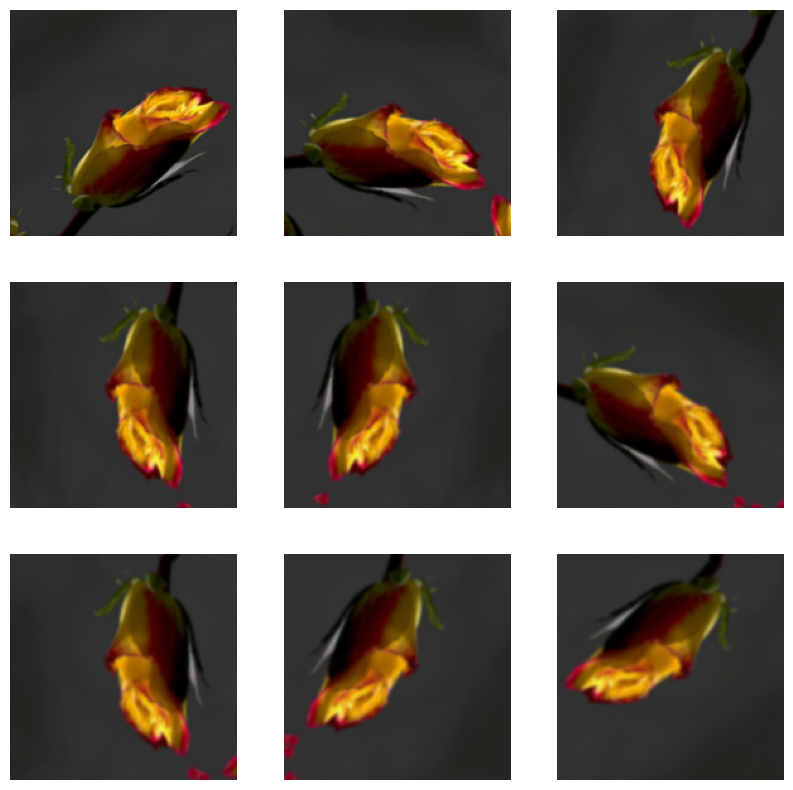

In [50]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [51]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_15 (Rescaling)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(train_ds, epochs=6, validation_data=val_ds)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 454ms/step - accuracy: 0.4690 - loss: 0.7527 - val_accuracy: 0.5248 - val_loss: 0.6923
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 434ms/step - accuracy: 0.5316 - loss: 0.6921 - val_accuracy: 0.5017 - val_loss: 0.6935
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 435ms/step - accuracy: 0.5082 - loss: 0.6913 - val_accuracy: 0.5149 - val_loss: 0.7026
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 447ms/step - accuracy: 0.5210 - loss: 0.6932 - val_accuracy: 0.5149 - val_loss: 0.7058
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 434ms/step - accuracy: 0.5093 - loss: 0.6911 - val_accuracy: 0.4884 - val_loss: 0.7069
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 422ms/step - accuracy: 0.5086 - loss: 0.6852 - val_accuracy: 0.5116 - val_loss: 0.7015


In [57]:
def classify_image(image_path):
    # Load and preprocess the image
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension
    input_image_exp_dim = input_image_exp_dim / 255.0 


In [65]:
result = classify_images('C:\\Users\\Shabnoor\\Downloads\\Sample\\ro se.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The Image belongs to rose with a score of 100.0


In [66]:
model.save('binaryFlower.keras')